# Progetto IUM - Data Analysis
## Università di Informatica, Unito
Gruppo Federico Raso, Federico Verra

In [222]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [223]:
data_directory = "../data/"
actors_df = pd.read_csv(data_directory+'actors.csv')
countries_df = pd.read_csv(data_directory+'countries.csv')
crew_df = pd.read_csv(data_directory+'crew.csv')
genres_df = pd.read_csv(data_directory+'genres.csv')
languages_df = pd.read_csv(data_directory+'languages.csv')
movies_df = pd.read_csv(data_directory+'movies.csv')
posters_df = pd.read_csv(data_directory+'posters.csv')
releases_df = pd.read_csv(data_directory+'releases.csv')
reviews_rotten_df = pd.read_csv(data_directory+'rotten_tomatoes_reviews.csv')
studios_df = pd.read_csv(data_directory+'studios.csv')
oscar_df = pd.read_csv(data_directory+'the_oscar_awards.csv')

## Analizzo e pulisco i dati

Movies_df

In [224]:
movies_df.dtypes

id               int64
name            object
date           float64
tagline         object
description     object
minute         float64
rating         float64
dtype: object

In [225]:
movies_df = movies_df[['id','name','date','minute','rating']].copy()

movies_df['date'] = pd.to_datetime(movies_df['date'], errors='coerce', format='%Y').fillna(pd.to_datetime(movies_df['date'],errors='coerce'))

movies_df.rename(columns={'name':'film_name','date':'film_date'}, inplace=True)

movies_df

,id,film_name,film_date,minute,rating
0,1000001,Barbie,2023-01-01,114.0,3.86
1,1000002,Parasite,2019-01-01,133.0,4.56
2,1000003,Everything Everywhere All at Once,2022-01-01,140.0,4.30
3,1000004,Fight Club,1999-01-01,139.0,4.27
4,1000005,La La Land,2016-01-01,129.0,4.09
...,...,...,...,...,...
941592,1941593,神笛,NaT,NaN,NaN
941593,1941594,蟲極道蜜団子抗争編 壱ノ巻,NaT,30.0,NaN
941594,1941595,蟲極道蜜団子抗争編 弐ノ巻,NaT,30.0,NaN
941595,1941596,重生,NaT,NaN,NaN


In [226]:
duplicati = movies_df.duplicated()  # Restituisce una serie booleana
numero_duplicati = duplicati.sum() 
print(numero_duplicati)

0


Oscar_df

In [227]:
oscar_df.dtypes

year_film         int64
year_ceremony     int64
ceremony          int64
category         object
name             object
film             object
winner             bool
dtype: object

In [228]:
oscar_df = oscar_df[['year_film','year_ceremony','category','name','film','winner']].copy()

oscar_df['year_film'] = pd.to_datetime(oscar_df['year_film'], errors='coerce', format='%Y').fillna(pd.to_datetime(oscar_df['year_film'],errors='coerce'))
oscar_df['year_ceremony'] = pd.to_datetime(oscar_df['year_ceremony'], errors='coerce', format='%Y').fillna(pd.to_datetime(oscar_df['year_ceremony'],errors='coerce'))

oscar_df.rename(columns={'year_film':'film_date','year_ceremony':'ceremony_date', 'name':'person_name','film':'film_name'}, inplace=True)

oscar_df

,film_date,ceremony_date,category,person_name,film_name,winner
0,1927-01-01,1928-01-01,ACTOR,Richard Barthelmess,The Noose,False
1,1927-01-01,1928-01-01,ACTOR,Emil Jannings,The Last Command,True
2,1927-01-01,1928-01-01,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927-01-01,1928-01-01,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927-01-01,1928-01-01,ACTRESS,Gloria Swanson,Sadie Thompson,False
...,...,...,...,...,...,...
10884,2023-01-01,2024-01-01,WRITING (Original Screenplay),Written by Celine Song,Past Lives,False
10885,2023-01-01,2024-01-01,JEAN HERSHOLT HUMANITARIAN AWARD,NaN,NaN,True
10886,2023-01-01,2024-01-01,HONORARY AWARD,"To Angela Bassett, who has inspired audiences ...",NaN,True
10887,2023-01-01,2024-01-01,HONORARY AWARD,"To Mel Brooks, for his comedic brilliance, pro...",NaN,True


In [229]:
duplicati = oscar_df.duplicated()  
numero_duplicati = duplicati.sum() 
print(numero_duplicati)

7


In [230]:
oscar_df.drop_duplicates(inplace=True)

## Quale paese ha vinto più oscar?
* Seleziono i vincitori di un Oscar
* Cerco tra i film vincitori chi ha una corrispondenza in movies_df secondo il nome e la data del film
* Cerco per ogni film vincitore il paese corrispondente

In [140]:
oscar_win_df = oscar_df.loc[
    (oscar_df['winner'] == True) & 
    (oscar_df['category'].isin(['FOREIGN LANGUAGE FILM', 'SPECIAL FOREIGN LANGUAGE FILM AWARD', 'HONORARY FOREIGN LANGUAGE FILM AWARD']))]
oscar_win_df

,year_film,year_ceremony,ceremony,category,name,film,winner
2278,1948,1949,21,SPECIAL FOREIGN LANGUAGE FILM AWARD,Monsieur Vincent - voted by the Academy Board...,NaN,True
2392,1949,1950,22,SPECIAL FOREIGN LANGUAGE FILM AWARD,The Bicycle Thief - voted by the Academy Boar...,NaN,True
2505,1950,1951,23,HONORARY FOREIGN LANGUAGE FILM AWARD,The Walls of Malapaga - voted by the Board of...,NaN,True
2624,1951,1952,24,HONORARY FOREIGN LANGUAGE FILM AWARD,Rashomon - voted by the Board of Governors as...,NaN,True
2749,1952,1953,25,HONORARY FOREIGN LANGUAGE FILM AWARD,Forbidden Games - Best Foreign Language Film f...,NaN,True
...,...,...,...,...,...,...,...
9695,2014,2015,87,FOREIGN LANGUAGE FILM,Poland,Ida,True
9822,2015,2016,88,FOREIGN LANGUAGE FILM,Hungary,Son of Saul,True
9946,2016,2017,89,FOREIGN LANGUAGE FILM,Iran,The Salesman,True
10070,2017,2018,90,FOREIGN LANGUAGE FILM,Chile,A Fantastic Woman,True


In [141]:
oscar_win_df = pd.merge(oscar_win_df, movies_df, left_on=['film','year_film'], right_on=['name','date'], how='inner')
oscar_win_df

,year_film,year_ceremony,ceremony,category,name_x,film,winner,id,name_y,date,tagline,description,minute,rating
0,1959,1960,32,FOREIGN LANGUAGE FILM,France,Black Orpheus,True,1004275,Black Orpheus,1959.0,The film that introduced Bossa Nova to the wor...,Young lovers Orfeu and Eurydice run through th...,100.0,3.82
1,1960,1961,33,FOREIGN LANGUAGE FILM,Sweden,The Virgin Spring,True,1003725,The Virgin Spring,1960.0,Ravished innocence... brings terrible revenge!,Devout Christians Töre and Märeta send their o...,90.0,4.13
2,1961,1962,34,FOREIGN LANGUAGE FILM,Sweden,Through a Glass Darkly,True,1003244,Through a Glass Darkly,1961.0,NaN,Karin hopes to recover from her recent stay at...,91.0,4.14
3,1962,1963,35,FOREIGN LANGUAGE FILM,France,Sundays and Cybele,True,1014722,Sundays and Cybele,1962.0,NaN,The tragic story of a young orphan girl who is...,110.0,3.87
4,1965,1966,38,FOREIGN LANGUAGE FILM,Czechoslovakia,The Shop on Main Street,True,1007798,The Shop on Main Street,1965.0,NaN,In a small town in Nazi-occupied Slovakia duri...,128.0,4.19
5,1966,1967,39,FOREIGN LANGUAGE FILM,France,A Man and a Woman,True,1006345,A Man and a Woman,1966.0,See it with someone you love!,A man and a woman meet by accident on a Sunday...,102.0,3.91
6,1969,1970,42,FOREIGN LANGUAGE FILM,Algeria,Z,True,1003188,Z,1969.0,He is alive!,Repression is the rule of the day in this film...,127.0,4.30
7,1972,1973,45,FOREIGN LANGUAGE FILM,France,The Discreet Charm of the Bourgeoisie,True,1002068,The Discreet Charm of the Bourgeoisie,1972.0,NaN,In Luis Buñuel’s deliciously satiric masterpie...,101.0,4.01
8,1973,1974,46,FOREIGN LANGUAGE FILM,France,Day for Night,True,1003038,Day for Night,1973.0,A movie for people who love movies,A committed film director struggles to complet...,116.0,4.17
9,1975,1976,48,FOREIGN LANGUAGE FILM,Union of Soviet Socialist Republics,Dersu Uzala,True,1004212,Dersu Uzala,1975.0,Kurosawa's Academy Award Winning Masterpiece,A military explorer meets and befriends a Gold...,141.0,4.23


In [142]:
oscar_win_df = oscar_win_df[['id','name_y','date','minute','rating','category','name_x','winner']].copy()
oscar_win_df = oscar_win_df.set_index('id')
oscar_win_df

,name_y,date,minute,rating,category,name_x,winner
id,,,,,,,
1004275,Black Orpheus,1959.0,100.0,3.82,FOREIGN LANGUAGE FILM,France,True
1003725,The Virgin Spring,1960.0,90.0,4.13,FOREIGN LANGUAGE FILM,Sweden,True
1003244,Through a Glass Darkly,1961.0,91.0,4.14,FOREIGN LANGUAGE FILM,Sweden,True
1014722,Sundays and Cybele,1962.0,110.0,3.87,FOREIGN LANGUAGE FILM,France,True
1007798,The Shop on Main Street,1965.0,128.0,4.19,FOREIGN LANGUAGE FILM,Czechoslovakia,True
1006345,A Man and a Woman,1966.0,102.0,3.91,FOREIGN LANGUAGE FILM,France,True
1003188,Z,1969.0,127.0,4.30,FOREIGN LANGUAGE FILM,Algeria,True
1002068,The Discreet Charm of the Bourgeoisie,1972.0,101.0,4.01,FOREIGN LANGUAGE FILM,France,True
1003038,Day for Night,1973.0,116.0,4.17,FOREIGN LANGUAGE FILM,France,True


In [143]:
oscar_win_df = pd.merge(oscar_win_df, countries_df, left_on='id', right_on='id', how='inner')
oscar_win_df

,id,name_y,date,minute,rating,category,name_x,winner,country
0,1004275,Black Orpheus,1959.0,100.0,3.82,FOREIGN LANGUAGE FILM,France,True,Brazil
1,1004275,Black Orpheus,1959.0,100.0,3.82,FOREIGN LANGUAGE FILM,France,True,France
2,1004275,Black Orpheus,1959.0,100.0,3.82,FOREIGN LANGUAGE FILM,France,True,Italy
3,1003725,The Virgin Spring,1960.0,90.0,4.13,FOREIGN LANGUAGE FILM,Sweden,True,Sweden
4,1003244,Through a Glass Darkly,1961.0,91.0,4.14,FOREIGN LANGUAGE FILM,Sweden,True,Sweden
...,...,...,...,...,...,...,...,...,...
93,1003729,A Fantastic Woman,2017.0,104.0,3.73,FOREIGN LANGUAGE FILM,Chile,True,Spain
94,1003729,A Fantastic Woman,2017.0,104.0,3.73,FOREIGN LANGUAGE FILM,Chile,True,USA
95,1000509,Roma,2018.0,135.0,4.10,FOREIGN LANGUAGE FILM,Mexico,True,UK
96,1000509,Roma,2018.0,135.0,4.10,FOREIGN LANGUAGE FILM,Mexico,True,USA


In [144]:
conteggi = oscar_win_df['country'].value_counts()

conteggi_df = conteggi.reset_index()
conteggi_df.columns = ['country', 'count']  # Rinomina le colonne

conteggi_df

,country,count
0,France,23
1,Italy,7
2,Germany,7
3,UK,6
4,USA,5
5,Spain,4
6,Austria,4
7,Belgium,3
8,Netherlands,3
9,Switzerland,3


In [145]:
world = gpd.read_file(data_directory+'/countries/ne_110m_admin_0_countries.shp')
print(world.columns)

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)


In [147]:
conteggi_df['country'] = conteggi_df['country'].replace('USA','United States of America')
conteggi_df['country'] = conteggi_df['country'].replace('UK','United Kingdom')

In [148]:
merged = world.merge(conteggi_df,how='left',left_on='NAME',right_on='country')
merged['count']=merged['count'].fillna(0)

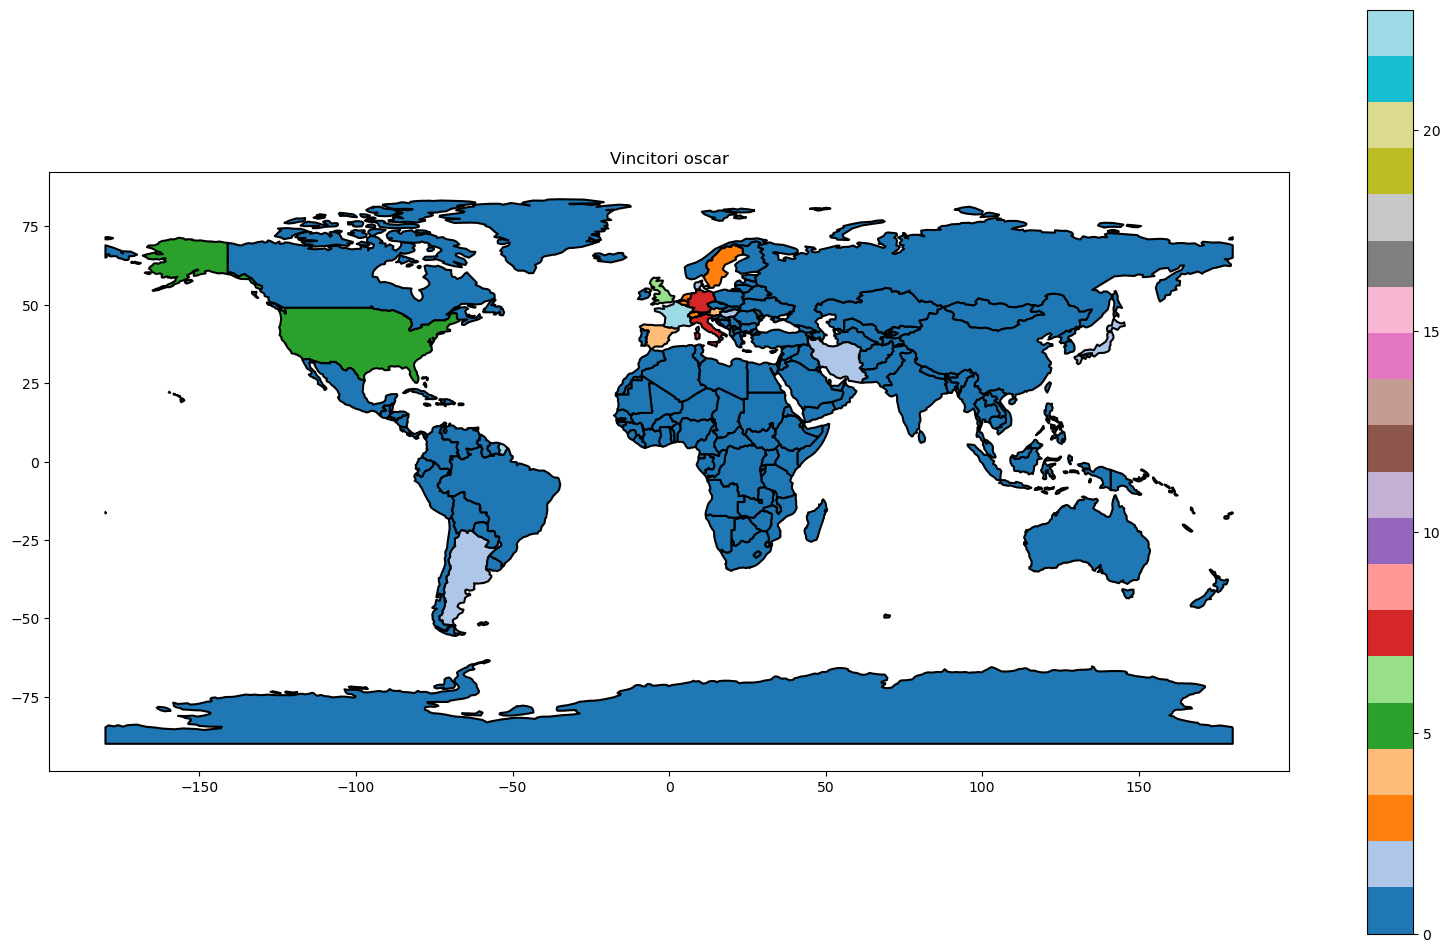

In [155]:
fig, ax = plt.subplots(1, 1, figsize=(20, 12))
merged.plot(column='count', ax=ax, legend=True,cmap='tab20',edgecolor='black',linewidth=1.5, figsize=(15,10))
plt.title('Vincitori oscar')
plt.show()

## Chi ha prodotto più film?

## La bellezza di un film, può essere influenzata dalla durata?

## Nel tempo come si è evoluta la durata media dei film?